In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('inflation-gdp.csv', sep =';')

In [3]:
print(f"Jumlah baris: {df.shape[0]}")

Jumlah baris: 11039


In [4]:
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah kolom: 4


In [5]:
df.head()

,Country,Country Code,Year,Inflation
0,Aruba,ABW,1985,403.225.805.628.628
1,Aruba,ABW,1986,107.396.640.826.829
2,Aruba,ABW,1987,364.304.545.817.706
3,Aruba,ABW,1988,312.186.849.610.723
4,Aruba,ABW,1989,399.162.804.604.575


In [6]:
print(df.isnull().sum()) #Cek ada yang null ga datanya

Country         0
Country Code    0
Year            0
Inflation       0
dtype: int64


In [7]:
print(f"Jumlah data duplikat: {df.duplicated().sum()}")

Jumlah data duplikat: 0


In [8]:
df.describe()

,Year
count,11039.000000
mean,1997.128725
std,16.961565
min,1960.000000
25%,1984.000000
50%,1999.000000
75%,2011.000000
max,2023.000000


In [9]:
print(df["Year"].value_counts())

Year
2011    240
2012    239
2013    238
2014    237
2016    236
       ... 
1964     79
1962     74
1963     74
1961     72
1960     70
Name: count, Length: 64, dtype: int64


In [10]:
print(df.dtypes)

Country         object
Country Code    object
Year             int64
Inflation       object
dtype: object


In [11]:
# Hapus baris yang mengandung NaN di kolom Year
df = df.dropna(subset=["Year"])

In [12]:
df_recent = df[df["Year"] >= df["Year"].max() - 10]

In [13]:
df["Year"] = df["Year"].astype(int)

In [14]:
print(df.dtypes)  # Year harus jadi int sekarang

Country         object
Country Code    object
Year             int64
Inflation       object
dtype: object


In [15]:
df_recent = df[df["Year"] >= df["Year"].max() - 10]

In [16]:
# Hapus NaN pada kolom Inflasi
df = df.dropna(subset=["Inflation"])

# Hapus karakter yang bukan angka (misalnya koma atau titik ribuan)
df["Inflation"] = df["Inflation"].str.replace(",", "").str.replace(".", "")

# Konversi ke float
df["Inflation"] = pd.to_numeric(df["Inflation"], errors="coerce")

# Hapus baris yang masih tidak valid setelah konversi
df = df.dropna(subset=["Inflation"])


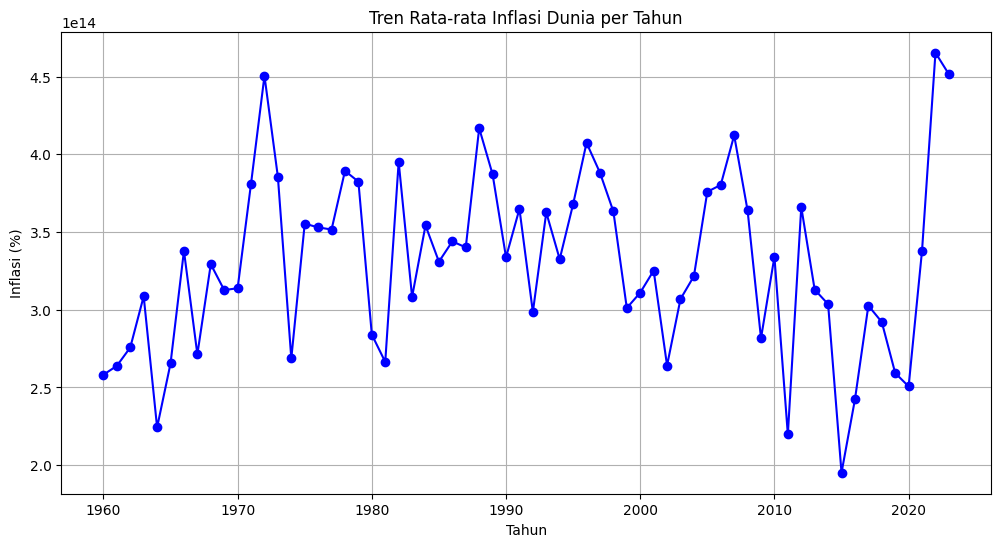

In [17]:
# Hitung rata-rata inflasi per tahun
df_avg = df.groupby("Year")["Inflation"].mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_avg.index, df_avg.values, marker="o", linestyle="-", color="b")
plt.title("Tren Rata-rata Inflasi Dunia per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Inflasi (%)")
plt.grid(True)
plt.show()


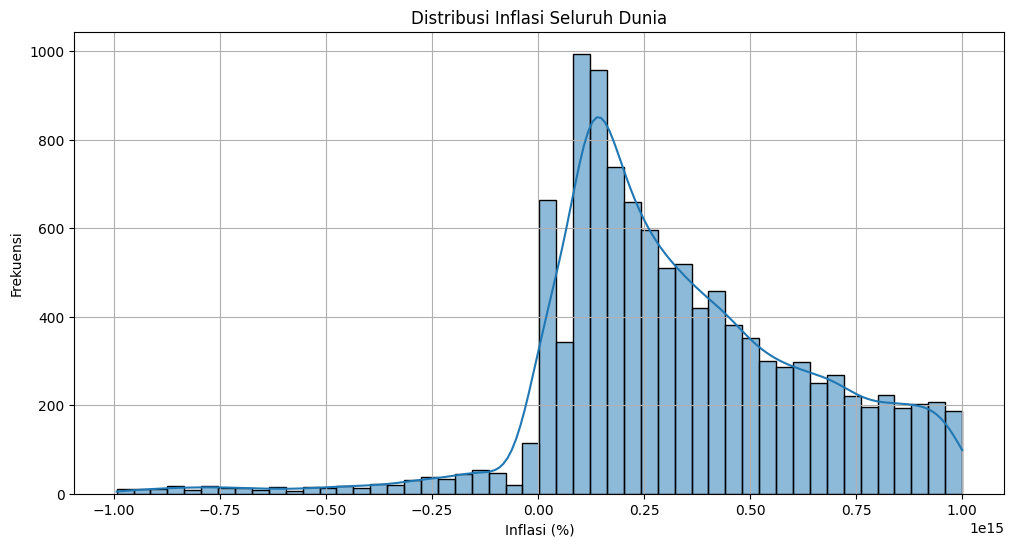

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(df["Inflation"], bins=50, kde=True)
plt.title("Distribusi Inflasi Seluruh Dunia")
plt.xlabel("Inflasi (%)")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.show()


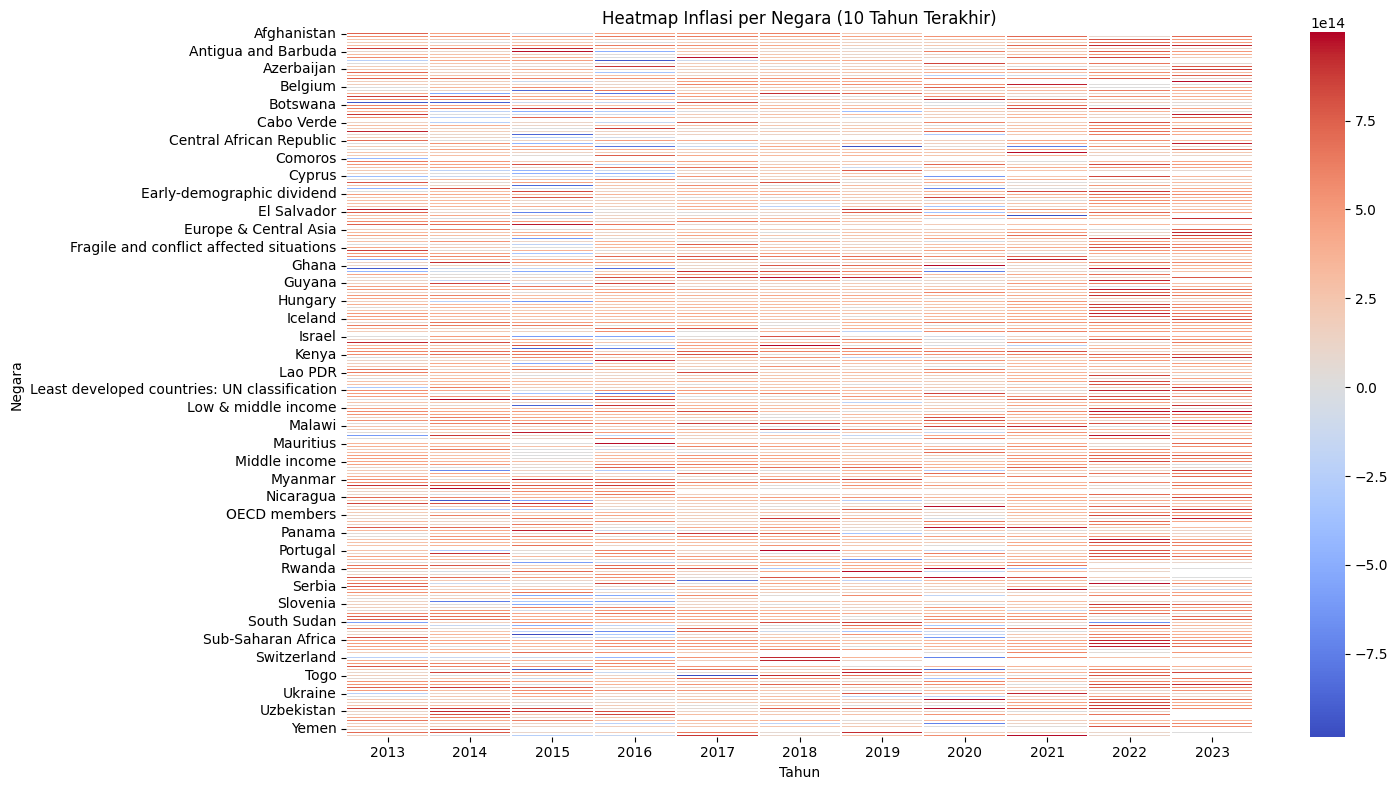

In [19]:
df_recent = df[df["Year"] >= df["Year"].max() - 10]

# Hitung rata-rata jika ada data duplikat
df_avg = df_recent.groupby(["Country", "Year"])["Inflation"].mean().reset_index()

heatmap_data = df_avg.pivot(index="Country", columns="Year", values="Inflation")

plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, cmap="coolwarm", linewidths=0.3)
plt.title("Heatmap Inflasi per Negara (10 Tahun Terakhir)")
plt.xlabel("Tahun")
plt.ylabel("Negara")
plt.tight_layout()
plt.show()


In [20]:
df["Year"] = df["Year"].astype(int)  # Ubah "Year" menjadi tipe integer
df_recent = df[df["Year"] >= df["Year"].max() - 10]


In [21]:
df_pivot = heatmap_data

In [22]:
df_cleaned = df_recent.groupby(["Country", "Year"], as_index=False)["Inflation"].mean()


In [23]:
df_pivot = df_cleaned.pivot(index="Country", columns="Year", values="Inflation")


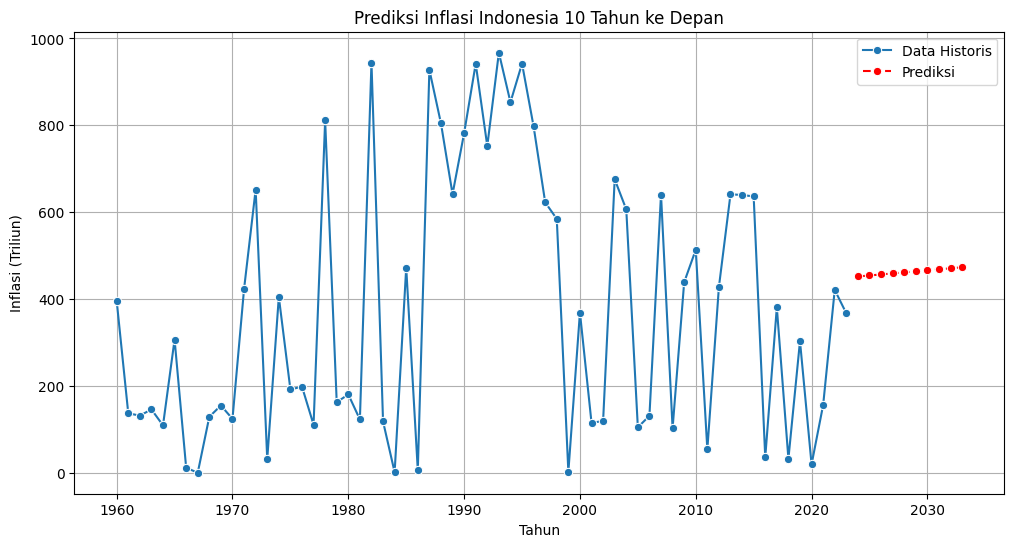

In [24]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Filter data hanya untuk Indonesia
df_indo = df[df["Country"] == "Indonesia"].copy()

# Ubah angka inflasi ke triliunan agar lebih rapi
df_indo["Inflation"] = df_indo["Inflation"] / 1e12

# Urutkan data berdasarkan tahun
df_indo = df_indo.sort_values(by="Year")

# Pisahkan fitur (X) dan target (y)
X = df_indo["Year"].values.reshape(-1, 1)  # Tahun sebagai fitur
y = df_indo["Inflation"].values  # Inflasi sebagai target

# Buat model regresi linear
model = LinearRegression()
model.fit(X, y)

# Prediksi untuk 10 tahun ke depan
future_years = np.arange(df_indo["Year"].max() + 1, df_indo["Year"].max() + 11).reshape(-1, 1)
future_predictions = model.predict(future_years)

# Buat DataFrame untuk prediksi
df_future = pd.DataFrame({"Year": future_years.flatten(), "Inflation": future_predictions})

# Gabungkan data historis dan prediksi
df_combined = pd.concat([df_indo, df_future])

# Buat plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_indo, x="Year", y="Inflation", marker="o", label="Data Historis")
sns.lineplot(data=df_future, x="Year", y="Inflation", marker="o", linestyle="dashed", color="r", label="Prediksi")

# Tambahkan judul dan label sumbu
plt.title("Prediksi Inflasi Indonesia 10 Tahun ke Depan")
plt.xlabel("Tahun")
plt.ylabel("Inflasi (Triliun)")
plt.legend()
plt.grid(True)

# Tampilkan grafik
plt.show()


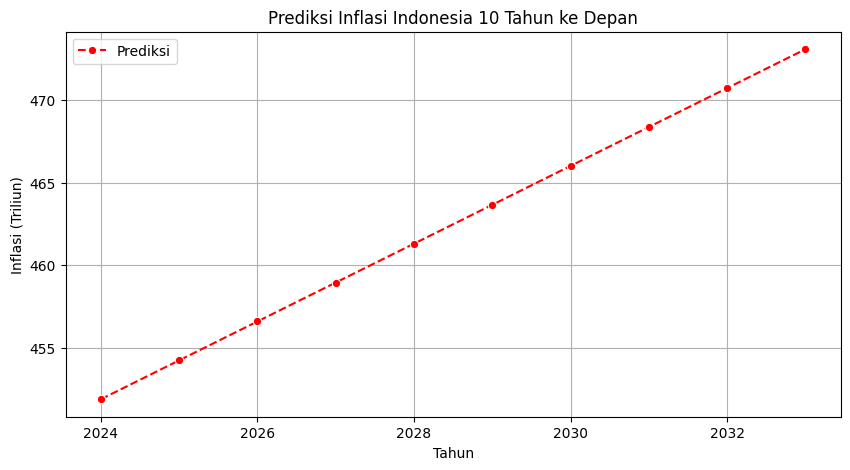

In [25]:
# Filter data hanya untuk Indonesia
df_indo = df[df["Country"] == "Indonesia"].copy()

# Ubah angka inflasi ke triliunan agar lebih rapi
df_indo["Inflation"] = df_indo["Inflation"] / 1e12

# Urutkan data berdasarkan tahun
df_indo = df_indo.sort_values(by="Year")

# Pisahkan fitur (X) dan target (y)
X = df_indo["Year"].values.reshape(-1, 1)  # Tahun sebagai fitur
y = df_indo["Inflation"].values  # Inflasi sebagai target

# Buat model regresi linear
model = LinearRegression()
model.fit(X, y)

# Prediksi untuk 10 tahun ke depan
future_years = np.arange(df_indo["Year"].max() + 1, df_indo["Year"].max() + 11).reshape(-1, 1)
future_predictions = model.predict(future_years)

# Buat DataFrame untuk prediksi
df_future = pd.DataFrame({"Year": future_years.flatten(), "Inflation": future_predictions})

# Buat plot untuk prediksi
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_future, x="Year", y="Inflation", marker="o", linestyle="dashed", color="r", label="Prediksi")

# Tambahkan judul dan label sumbu
plt.title("Prediksi Inflasi Indonesia 10 Tahun ke Depan")
plt.xlabel("Tahun")
plt.ylabel("Inflasi (Triliun)")
plt.legend()
plt.grid(True)

# Tampilkan grafik
plt.show()


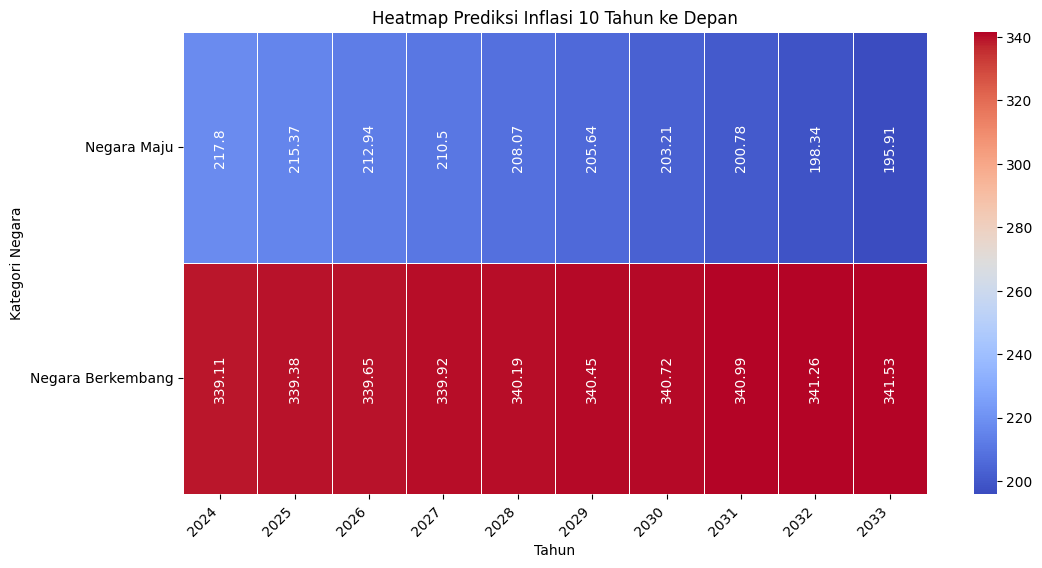

In [26]:
# Klasifikasi negara: berkembang vs maju
developed_countries = {"United States", "Germany", "United Kingdom", "France", "Japan", "Canada", "Australia"}
developing_countries = set(df["Country"].unique()) - developed_countries  # Sisanya dianggap negara berkembang

# Tahun prediksi (10 tahun ke depan)
future_years = np.arange(df["Year"].max() + 1, df["Year"].max() + 11)

# Fungsi untuk menghitung rata-rata inflasi per kategori negara
def get_average_inflation(country_list):
    df_filtered = df[df["Country"].isin(country_list)]
    avg_inflation = df_filtered.groupby("Year")["Inflation"].mean().reset_index()
    return avg_inflation

# Data rata-rata inflasi negara maju & berkembang
df_developed = get_average_inflation(developed_countries)
df_developing = get_average_inflation(developing_countries)

# Fungsi untuk prediksi menggunakan regresi linear
def predict_future(df_category):
    X = df_category["Year"].values.reshape(-1, 1)
    y = df_category["Inflation"].values

    model = LinearRegression()
    model.fit(X, y)

    future_predictions = model.predict(future_years.reshape(-1, 1))
    return future_predictions

# Prediksi 10 tahun ke depan
predicted_developed = predict_future(df_developed)
predicted_developing = predict_future(df_developing)

# Buat DataFrame untuk heatmap dengan pembulatan hanya 5 angka pertama
future_data = pd.DataFrame({
    "Year": future_years,
    "Negara Maju": np.round(predicted_developed / 1e12, 5),
    "Negara Berkembang": np.round(predicted_developing / 1e12, 5)
})

# Pivot untuk heatmap
heatmap_data = future_data.set_index("Year")

# Plot heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(heatmap_data.T, cmap="coolwarm", annot=True, fmt=".5g", linewidths=0.5, annot_kws={"size": 10})

# Mengatur angka agar vertikal
for text in ax.texts:
    text.set_rotation(90)  # Angka di-rotate vertikal agar tidak bertumpuk
    text.set_size(10)  # Atur ukuran font agar tetap terbaca

# Atur tampilan
plt.title("Heatmap Prediksi Inflasi 10 Tahun ke Depan")
plt.xlabel("Tahun")
plt.ylabel("Kategori Negara")

plt.xticks(rotation=45, ha="right")  # Rotasi label tahun agar lebih jelas
plt.yticks(rotation=0)

plt.show()


In [28]:
#Daftar negara sudah sesuai dengan World Bank
developed_countries = [
    "United States", "Canada", "United Kingdom", "Germany", "France",
    "Italy", "Japan", "Australia", "South Korea", "Netherlands",
    "Sweden", "Switzerland", "Norway", "Denmark", "New Zealand"
]

developing_countries = [
    "Indonesia", "India", "Brazil", "Vietnam", "Philippines",
    "Nigeria", "Pakistan", "Bangladesh", "Egypt", "Kenya",
    "Peru", "Thailand", "Mexico", "South Africa", "Argentina"
]

In [29]:
df['Group'] = df['Country'].apply(
    lambda x: 'Developed' if x in developed_countries else (
        'Developing'
    )
)

In [30]:
df_dev = df[df['Group'] == 'Developed']
df_dev2 = df[df['Group'] == 'Developing']

In [31]:
from scipy.stats import pearsonr

r_dev, _ = pearsonr(df_dev['Year'], df_dev['Inflation'])
r_dev2, _ = pearsonr(df_dev2['Year'], df_dev2['Inflation'])

print(f"Korelasi negara maju (Developed): {r_dev:.3f}")
print(f"Korelasi negara berkembang (Developing): {r_dev2:.3f}")

Korelasi negara maju (Developed): -0.184
Korelasi negara berkembang (Developing): 0.001


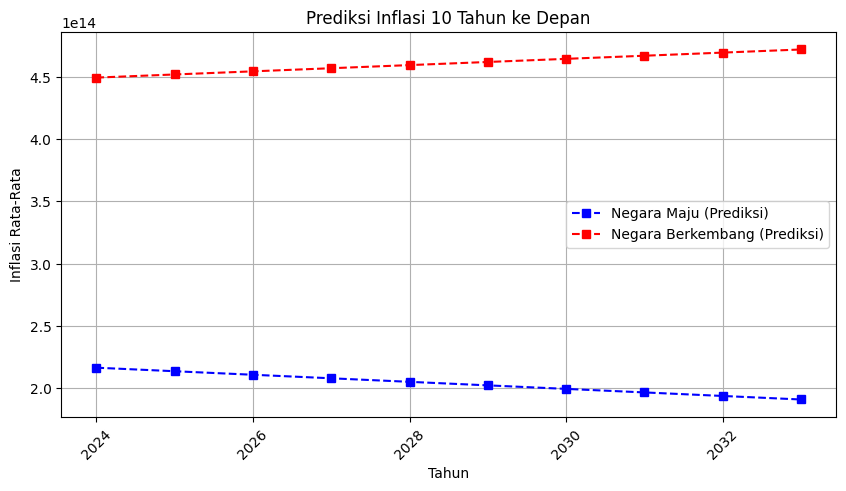

In [32]:
# Tahun prediksi (10 tahun ke depan)
future_years = np.arange(df["Year"].max() + 1, df["Year"].max() + 11).reshape(-1, 1)

# Fungsi untuk menghitung rata-rata inflasi per kategori negara
def get_average_inflation(country_list):
    df_filtered = df[df["Country"].isin(country_list)]
    avg_inflation = df_filtered.groupby("Year")["Inflation"].mean().reset_index()
    return avg_inflation

# Data rata-rata inflasi negara maju & berkembang
df_developed = get_average_inflation(developed_countries)
df_developing = get_average_inflation(developing_countries)

# Fungsi untuk prediksi menggunakan regresi linear
def predict_future(df_category):
    X = df_category["Year"].values.reshape(-1, 1)
    y = df_category["Inflation"].values

    model = LinearRegression()
    model.fit(X, y)

    future_predictions = model.predict(future_years)
    return future_predictions

# Prediksi 10 tahun ke depan
predicted_developed = predict_future(df_developed)
predicted_developing = predict_future(df_developing)

# Plot grafik
plt.figure(figsize=(10, 5))
plt.plot(future_years, predicted_developed, marker="s", linestyle="--", label="Negara Maju (Prediksi)", color="blue")
plt.plot(future_years, predicted_developing, marker="s", linestyle="--", label="Negara Berkembang (Prediksi)", color="red")

plt.title("Prediksi Inflasi 10 Tahun ke Depan")
plt.xlabel("Tahun")
plt.ylabel("Inflasi Rata-Rata")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [33]:
# Misal mengambil data 10 tahun terakhir dari df_recent
df_10yr = df_recent[df_recent["Year"] >= df_recent["Year"].max() - 9]

In [34]:
print(df.columns)

Index(['Country', 'Country Code', 'Year', 'Inflation', 'Group'], dtype='object')


In [35]:
df_10yr = df[df["Year"] >= df["Year"].max() - 10].copy()

In [36]:
print(df_10yr.columns)

Index(['Country', 'Country Code', 'Year', 'Inflation', 'Group'], dtype='object')


<Figure size 1200x600 with 0 Axes>

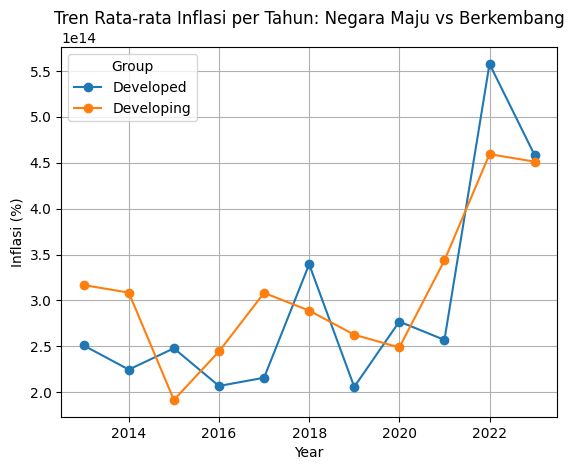

In [37]:
plt.figure(figsize=(12, 6))
df_10yr.groupby(["Year", "Group"])["Inflation"].mean().unstack().plot(marker='o')
plt.title("Tren Rata-rata Inflasi per Tahun: Negara Maju vs Berkembang")
plt.ylabel("Inflasi (%)")
plt.grid(True)
plt.show()


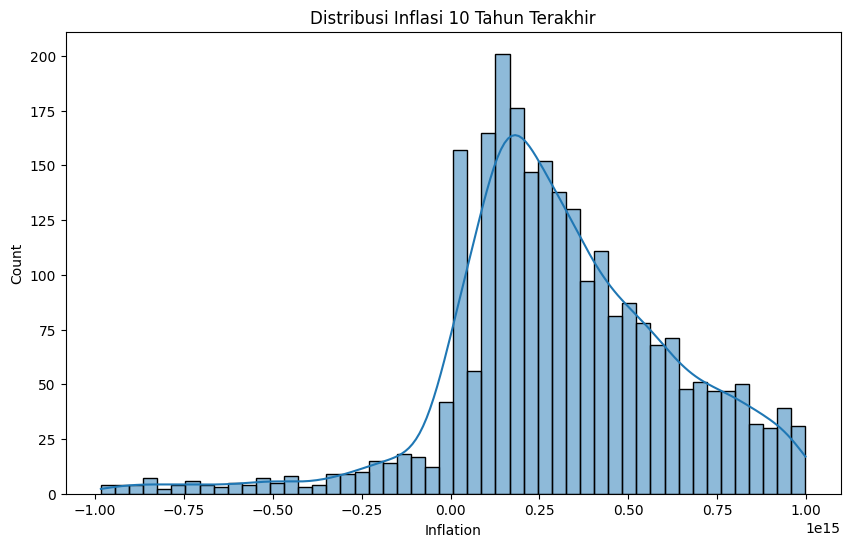

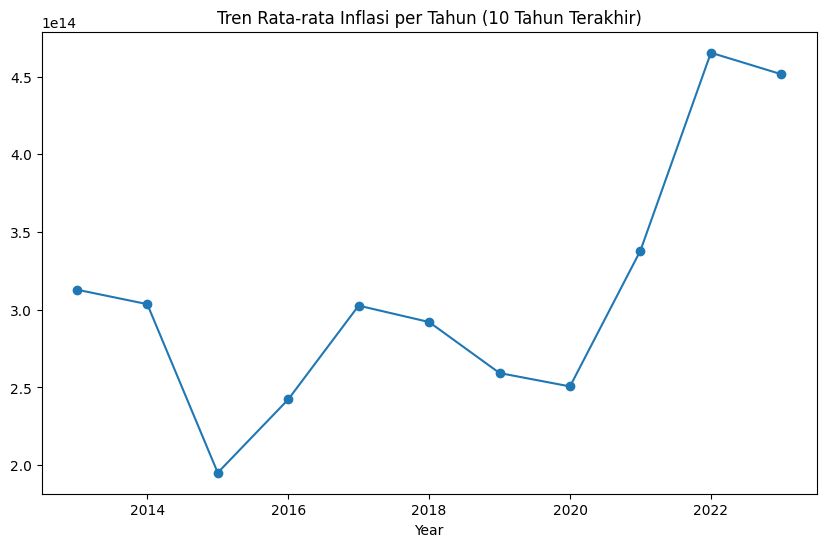

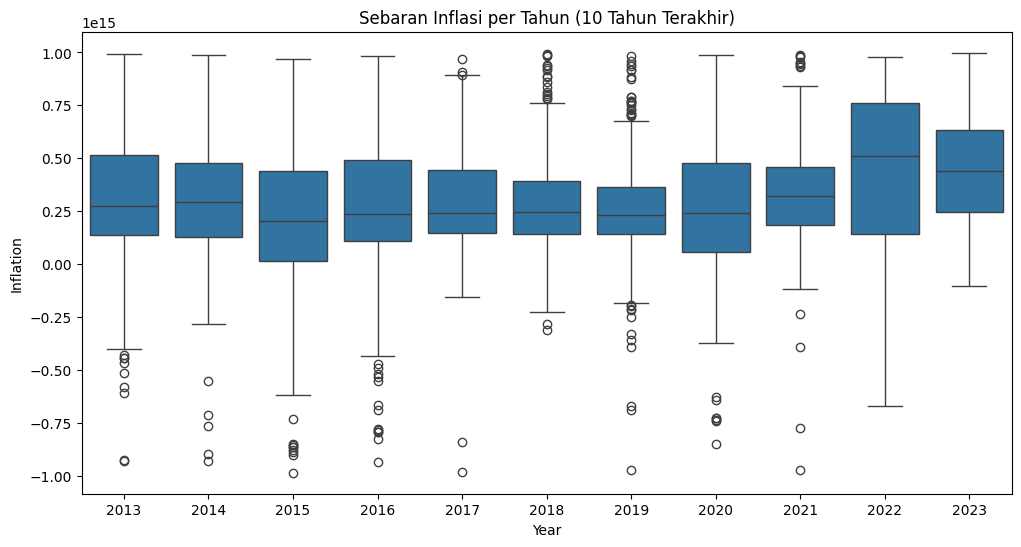

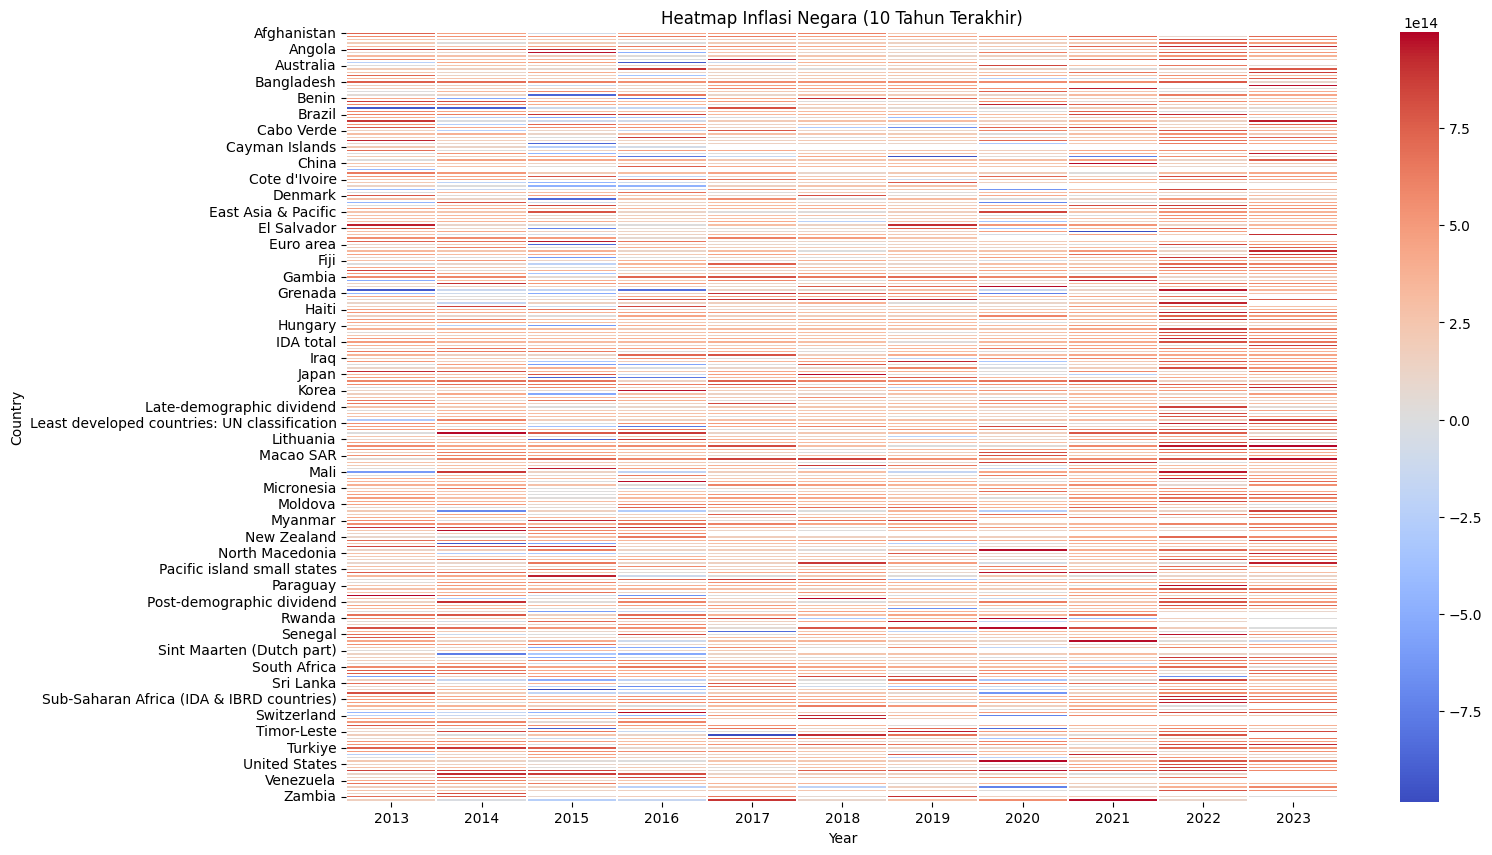

In [38]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_10yr['Inflation'], bins=50, kde=True)
plt.title("Distribusi Inflasi 10 Tahun Terakhir")
plt.show()

# Rata-rata per tahun
plt.figure(figsize=(10, 6))
df_10yr.groupby("Year")["Inflation"].mean().plot(marker='o')
plt.title("Tren Rata-rata Inflasi per Tahun (10 Tahun Terakhir)")
plt.show()

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Year", y="Inflation", data=df_10yr)
plt.title("Sebaran Inflasi per Tahun (10 Tahun Terakhir)")
plt.show()

# Heatmap
heatmap_data = df_10yr.groupby(['Country', 'Year'])['Inflation'].mean().reset_index()
heatmap_pivot = heatmap_data.pivot(index='Country', columns='Year', values='Inflation')

plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_pivot, cmap="coolwarm", linewidths=0.3)
plt.title("Heatmap Inflasi Negara (10 Tahun Terakhir)")
plt.show()


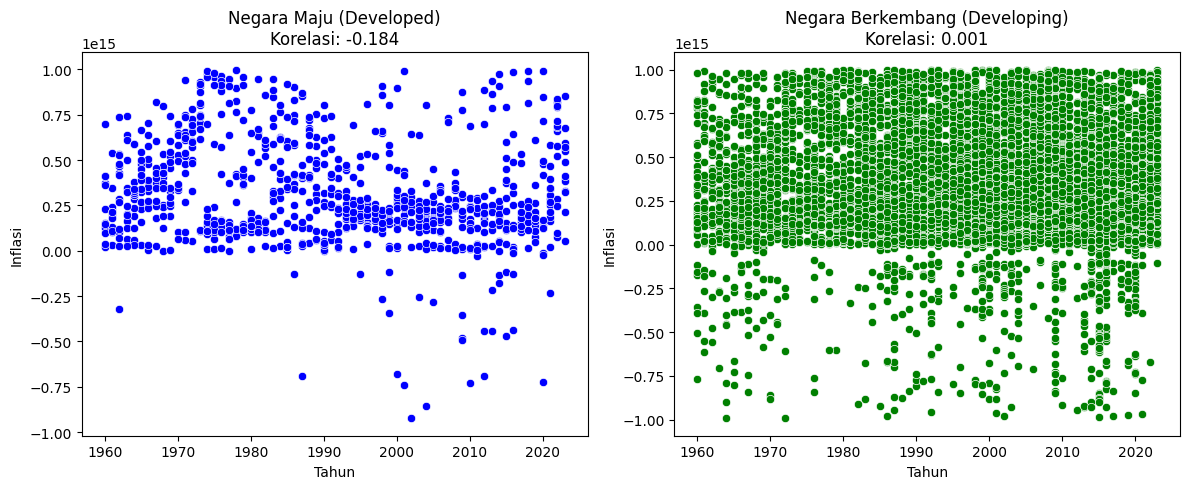

In [39]:
plt.figure(figsize=(12, 5))

# Scatter plot untuk negara maju
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_dev, x="Year", y="Inflation", color="blue")
plt.title(f"Negara Maju (Developed)\nKorelasi: {r_dev:.3f}")
plt.xlabel("Tahun")
plt.ylabel("Inflasi")

# Scatter plot untuk negara berkembang
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_dev2, x="Year", y="Inflation", color="green")
plt.title(f"Negara Berkembang (Developing)\nKorelasi: {r_dev2:.3f}")
plt.xlabel("Tahun")
plt.ylabel("Inflasi")

plt.tight_layout()
plt.show()
